In [23]:
import numpy as np
from tensorflow import keras
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
# Change paths according to what model you want to test
# Load the saved model
model = keras.models.load_model('LSTM Models/model_20230607_205656.h5')

# Load the saved tokenizer
with open('LSTM Tokenizer/tokenizer_20230607_210039.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Generated movie reviews
reviews = [
"The acting in this movie was incredible! Definitely a must-watch.",
"I found the plot of this film to be confusing and poorly executed.",
"The cinematography and visuals in this movie were breathtaking. Highly recommended!",
"I was disappointed by the lackluster performances in this film. Not worth the hype.",
"This movie kept me on the edge of my seat from start to finish. Brilliant storytelling!",
"The dialogue in this film felt forced and unnatural. I couldn't connect with the characters.",
"The soundtrack of this movie was fantastic and added so much to the overall experience. Loved it!",
"The pacing of the film was too slow for my liking. I lost interest halfway through.",
"The chemistry between the lead actors was palpable. Their performances were outstanding!",
"I found the plot twists in this movie to be predictable and clichéd. Nothing new or exciting.",
"The humor in this film had me laughing out loud. A delightful and enjoyable watch!",
"The special effects in this movie were subpar. They looked cheap and unconvincing.",
"The character development in this film was top-notch. I was emotionally invested in their journeys.",
"The editing in this movie was choppy and disjointed. It hindered my understanding of the story.",
"The messages and themes explored in this film were thought-provoking. It left a lasting impact.",
"The lack of diversity in the cast and crew of this movie was disappointing. Representation matters.",
"The cinematography in this film was breathtaking. Each frame was a work of art.",
"The plot of this movie was engaging and kept me guessing until the end. A great suspense thriller!",
"The dialogue in this film was smart and witty. The script was well-written and engaging.",
"The acting performances in this movie were wooden and lacked depth. It felt like a missed opportunity.",
"The direction of this film was superb. Every scene was meticulously crafted. A true cinematic gem.",
"I couldn't help but be moved by the emotional performances in this movie. It tugged at my heartstrings.",
"The plot of this film was convoluted and confusing. It was hard to follow and left me unsatisfied.",
"The visual effects in this movie were mind-blowing. It transported me to a whole new world.",
"The pacing of this film was perfect. It kept me engaged from beginning to end. Highly recommended!",
"The lead actor's performance in this movie was exceptional. They brought the character to life.",
"The script of this film was clichéd and predictable. It lacked originality and failed to surprise.",
"The soundtrack in this movie was hauntingly beautiful. It added depth and emotion to every scene.",
"The cinematography in this film was lackluster. It failed to capture the essence of the story.",
"The chemistry between the romantic leads in this movie was undeniable. It made my heart flutter.",
"The action sequences in this film were adrenaline-pumping. I was on the edge of my seat.",
"The plot of this movie was thin and uninteresting. It failed to engage and left me bored.",
"The costume design in this film was exquisite. It added authenticity and brought the characters to life.",
"The dialogue in this movie was cheesy and cringe-worthy. It took away from the overall experience.",
"The social commentary in this film was powerful. It shed light on important issues in a thought-provoking way.",
"The performances in this movie were underwhelming. The actors lacked conviction and emotion.",
"The humor in this film was clever and had me laughing throughout. A delightful comedy!",
"The production design in this movie was stunning. Every detail was meticulously crafted.",
"The plot twists in this film were unexpected and kept me guessing. It kept me hooked till the end.",
"The character development in this movie was shallow and unconvincing. I couldn't connect with them.",
"The emotional depth in this film was palpable. It touched my heart and left me reflecting.",
"The editing in this movie was seamless. It enhanced the storytelling and created a cohesive narrative.",
"The themes explored in this film were thought-provoking. It challenged societal norms and sparked conversations.",
"The cinematography in this movie was bland and uninspiring. It lacked visual creativity.",
"The performances in this film were lackluster. The actors seemed disengaged and their delivery felt forced.",
"The soundtrack of this movie was forgettable. It failed to enhance the emotional impact of the scenes.",
"The plot of this film was predictable and formulaic. It offered no surprises or originality.",
"The chemistry between the ensemble cast in this movie was electric. Their interactions were a joy to watch.",
"The visual aesthetics in this film were breathtaking. Every frame was like a work of art.",
"The storytelling in this movie was disjointed and confusing. It failed to provide a coherent narrative."
]

In [43]:
total_reviews = len(reviews)
total_reviews

50

In [44]:
# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 250 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'

In [45]:
# Tokenize the reviews using the loaded tokenizer
sequences = tokenizer.texts_to_sequences(reviews)

# Pad the sequences using the maximum length from training
padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_length)

# Predict the labels
predicted_labels = model.predict(padded_sequences)

# Convert the predicted labels to binary values (0 or 1)
predicted_labels = np.round(predicted_labels).flatten()
print(predicted_labels)

# Store the predicted labels in a list
predicted_labels_list = []
for label in predicted_labels:
    if label >= 0.5:
        predicted_labels_list.append(1)
    else:
        predicted_labels_list.append(0)

# Convert the predicted labels_list to a NumPy array
predicted_labels = np.array(predicted_labels_list)

# Print the predicted labels for the reviews
for i, review in enumerate(reviews):
    sentiment = "Positive" if predicted_labels[i] == 1 else "Negative"
    print("Review:", review)
    print("Predicted Sentiment:", sentiment)
    print()

2/2 [==============================] - 1s 20ms/step
Review: The acting in this movie was incredible! Definitely a must-watch.
Predicted Sentiment: Positive

Review: I found the plot of this film to be confusing and poorly executed.
Predicted Sentiment: Negative

Review: The cinematography and visuals in this movie were breathtaking. Highly recommended!
Predicted Sentiment: Positive

Review: I was disappointed by the lackluster performances in this film. Not worth the hype.
Predicted Sentiment: Negative

Review: This movie kept me on the edge of my seat from start to finish. Brilliant storytelling!
Predicted Sentiment: Positive

Review: The dialogue in this film felt forced and unnatural. I couldn't connect with the characters.
Predicted Sentiment: Negative

Review: The soundtrack of this movie was fantastic and added so much to the overall experience. Loved it!
Predicted Sentiment: Positive

Review: The pacing of the film was too slow for my liking. I lost interest halfway through.
Pre

In [46]:
# Assuming you have the true labels and predicted labels
true_labels = np.array([1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,1,1,0,1,1,1,0,0,0,0,1,1,0])

Confusion Matrix:
[[20  1]
 [ 3 26]]


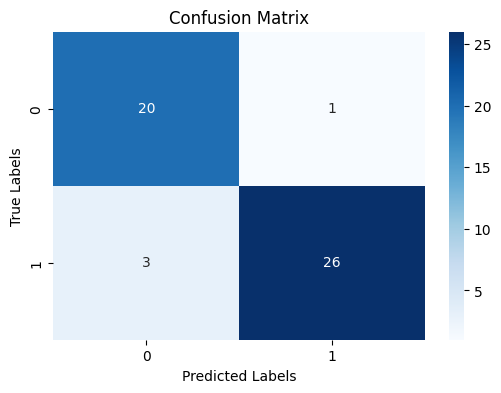

In [47]:
# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [48]:
# Calculate precision, recall, and F1-score for each class
report = classification_report(true_labels, predicted_labels)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.96      0.90      0.93        29

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



In [49]:
# Visualize predictions
data = pd.DataFrame({'True Labels': true_labels, 'Predicted Labels': predicted_labels})
sample_predictions = data.sample(n=5)  # Select a random sample of predictions
print("\nSample Predictions:")
print(sample_predictions)


Sample Predictions:
    True Labels  Predicted Labels
29            1                 1
8             1                 1
37            1                 1
28            0                 0
0             1                 1


In [50]:
# Error analysis
misclassified_samples = data[data['True Labels'] != data['Predicted Labels']]  # Filter misclassified samples
print("\nMisclassified Samples:")
print(misclassified_samples)


Misclassified Samples:
    True Labels  Predicted Labels
12            1                 0
13            0                 1
14            1                 0
32            1                 0
